# <a id='link2'>Background & Context:</a>
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply.

# <a id='link2'>Objective:</a>     

1. Explore and visualize the dataset.
2. Build a linear regression model to predict the prices of used cars.
3. Generate a set of insights and recommendations that will help the business.

# <a id='link2'>Data Dictionary:</a>
1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

# <a id='link2'>Loading Libraries</a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# <a id='link2'>Loading and exploring the data</a>

In [2]:
data = pd.read_csv("used_cars_data.csv", index_col=0)
df = data.copy() # Making a copy of the data
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

# Setting the random seed to look at 10 random rows
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 13 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50


* The dataset has 7253 rows and 13 columns.
* Looking at these 10 random rows, we can see that there are some columns that are represented as strings but we want those columns to be numeric.
* This preview also shows that New_Price column potentially have a lot of missingness so we'll want to make sure to look into that.

### Checking for missing values

In [3]:
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [4]:
df.info() # Checking the dataset info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [5]:
df.drop(['New_Price'],axis=1,inplace=True) # Dropping the New_price column

* New_Price column has an high count of missing values which is more than 50%, therfore it's not going to be of any use to the model, because artificially imputing the values will make the information irrelevant to the model. So, we will drop the variable.
* Columns like Mileage, Engine, Power which currently appears as an object needs to be converted into just a number by removing there units.

# <a id='link2'>Processing Columns</a>

### Columns containing units

* For these, we have columns that are strings containing a mix of values, units and np.nan. We will process these by just taking the number before the units for the non-missing values, while the np.nans will stay as such.
* For Power column, some of the missing values contain "null bhp", so we will replace them with NaN and impute them as missing values later.

In [6]:
df['Mileage'] = df['Mileage'].replace(['0.0 kmpl'],np.nan) # Replacing 0 mileage to treat as missing data

In [7]:
def engine_to_num(engine_val):
    if isinstance(engine_val, str):
        return float(engine_val.split(' ')[0])
    else:
        return np.nan

def mileage_to_num(mileage_val):
    if isinstance(mileage_val, str):
        return float(mileage_val.split(' ')[0])
    else:
        return np.nan
#df['Engine'] = df['Engine'].apply(engine_to_num)

col_transforms = {'Engine': engine_to_num,'Mileage': mileage_to_num}
for k,v in col_transforms.items():
    df[k] = df[k].map(v)

In [8]:
df['Power'] = df['Power'].replace(['null bhp'],np.nan)

def power_to_num(power_val):
    if isinstance(power_val, str):
        return float(power_val.split(' ')[0])
    else:
        return np.nan
df['Power'] = df['Power'].apply(power_to_num)

### Splitting `Name` into two columns
* Splitted Name column into two columns "Brand" and "Model".
* Retained just the Brand column, dropped Name and Model column as it will add too many variables in dummy.

In [9]:
brand_model = df["Name"].str.split(" ", n = 1, expand = True)
df.drop(['Name'], axis=1, inplace=True)
df["Brand"]= brand_model[0]

In [10]:
df = df[['Brand','Location','Year','Kilometers_Driven','Fuel_Type','Transmission',
         'Owner_Type','Mileage','Engine','Power','Seats','Price']]
df.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### Let's fix the missing values
* we will impute missing values in every numeeric column using KNNImputer

In [11]:
from sklearn.impute import KNNImputer

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
imputer = KNNImputer(n_neighbors=2)
df[numeric_columns]=imputer.fit_transform(df[numeric_columns])

### Removing any duplicate row

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape # The number of rows reduced from 7253 to 7249, so there were 4 duplicate rows in the dataset.

(7249, 12)

### Convert the object type columns to category type

In [14]:
df["Brand"] = df["Brand"].astype("category")
df["Location"] = df["Location"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Year"] = df["Year"].astype("int64")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Brand              7249 non-null   category
 1   Location           7249 non-null   category
 2   Year               7249 non-null   int64   
 3   Kilometers_Driven  7249 non-null   float64 
 4   Fuel_Type          7249 non-null   category
 5   Transmission       7249 non-null   category
 6   Owner_Type         7249 non-null   category
 7   Mileage            7249 non-null   float64 
 8   Engine             7249 non-null   float64 
 9   Power              7249 non-null   float64 
 10  Seats              7249 non-null   float64 
 11  Price              7249 non-null   float64 
dtypes: category(5), float64(6), int64(1)
memory usage: 490.8 KB


Now, every missing values has been imputed and everything that should be numeric indeed is and we can start looking at summary statistics

### Looking at value counts for non-numeric features

In [16]:
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts)
    print('\n\n')

Maruti           1442
Hyundai          1340
Honda             741
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Lamborghini         1
Hindustan           1
OpelCorsa           1
Smart               1
Ambassador          1
Name: Brand, dtype: int64



Mumbai        948
Hyderabad     875
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       652
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64



Diesel      385

In [17]:
# From the displayed data above, we can see that Isuzu Brand appeared in two places, so we will merge the two.
df['Brand'] = df['Brand'].replace(['ISUZU'],'Isuzu')

### Statistical summary for the dataset.

In [18]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,7249,32,Maruti,1442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7249,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7249,NaN,NaN,NaN,2013.37,3.25379,1996,2011,2014,2016,2019
Kilometers_Driven,7249,NaN,NaN,NaN,58711.3,84448.5,171,34000,53497,73000,6.5e+06
Fuel_Type,7249,5,Diesel,3850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7249,2,Manual,5200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7249,4,First,5948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7249,NaN,NaN,NaN,18.3347,4.14911,6.4,15.3,18.2,21.1,33.54
Engine,7249,NaN,NaN,NaN,1616.54,594.203,72,1198,1493,1968,5998
Power,7249,NaN,NaN,NaN,112.335,53.2439,34.2,75,93.7,138.03,616


## Insights:

- The *Brand* column has 32 unique values, and Maruti is the most frequent Brand.
- The *Location* column has 11 unique values, i.e., the data is collected from 11 different locations.
- Columns *Fuel_Type*, *Transmission* and *Owner_Type* have  5, 2 and 4 unique values respectively.
- *Year* ranges from 1996 to 2019.
- Average *Price* is 9 Lakh.
- Mileage has approximately same mean and median.
- Mean is greater than the median for Kilometers_Driven, Engine, Power and Price variable which suggests that these variables are right skewed.

# <a id='link2'>Exploratory Data Analysis and Data Preprocessing</a>

## Univariate analysis

In [19]:
# Writing a function to help create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(12,7), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, figsize = figsize, 
                                           gridspec_kw = {"height_ratios": (.25, .75)})
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

**Exploring the dependent variable *Price***

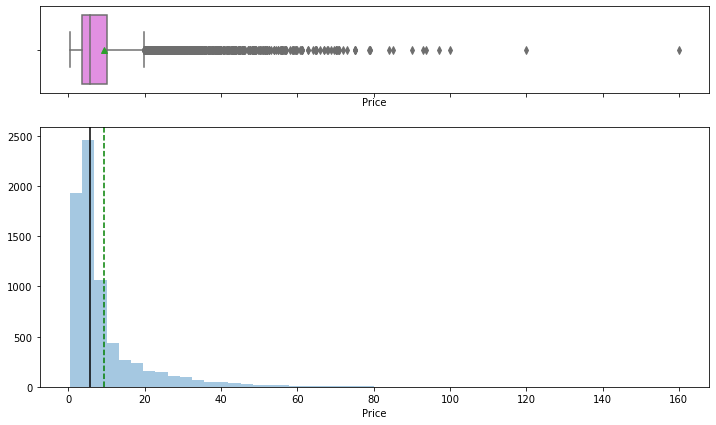

In [20]:
histogram_boxplot(df["Price"])

* Mean price is approximately 9 Lakh.
* The distribution is right skewed. 
* It has many outliers towards the higher end.

**Exploring the *Mileage* variable**

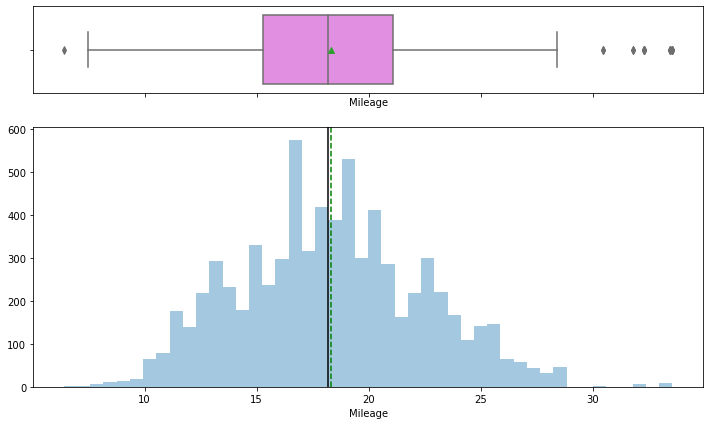

In [21]:
histogram_boxplot(df["Mileage"])

* Mileage is somewhat normal distributed.
* There are a few outliers present on both sides of the data .

**Exploring the distribution of all the numerical variable**

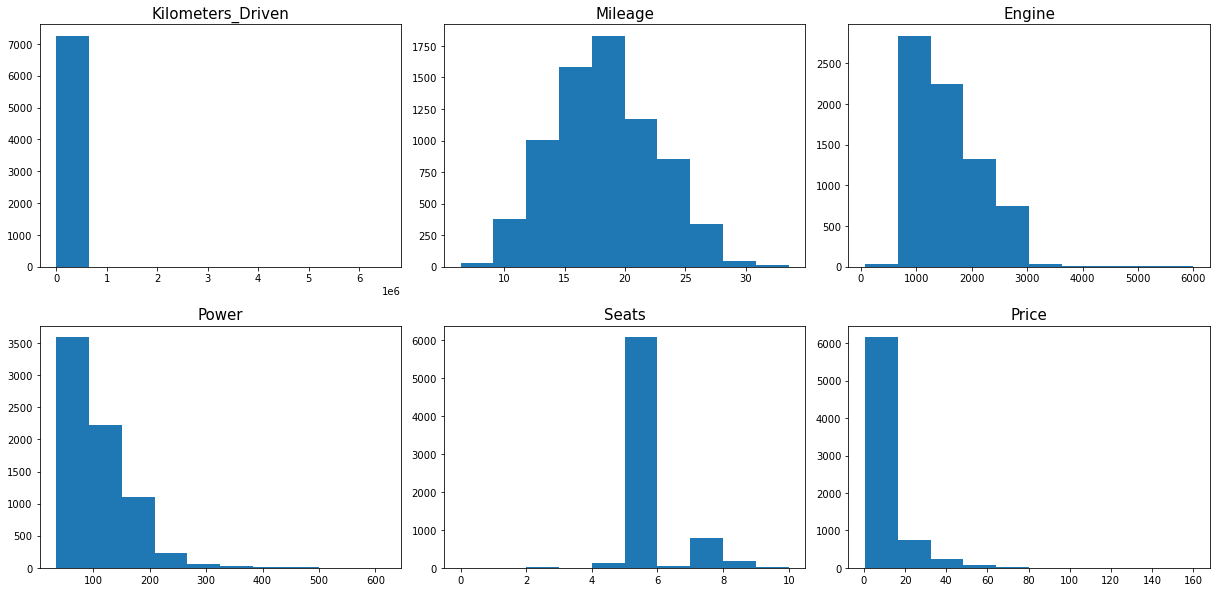

In [22]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col.remove("Year")

plt.figure(figsize=(17, 75))

for i in range(len(num_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(df[num_col[i]])
    plt.tight_layout()
    plt.title(num_col[i], fontsize=15)

* Kilometers_Driven, Engine, Power are right skewed
* There are outliers present in all the variables.

In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

**Brand**

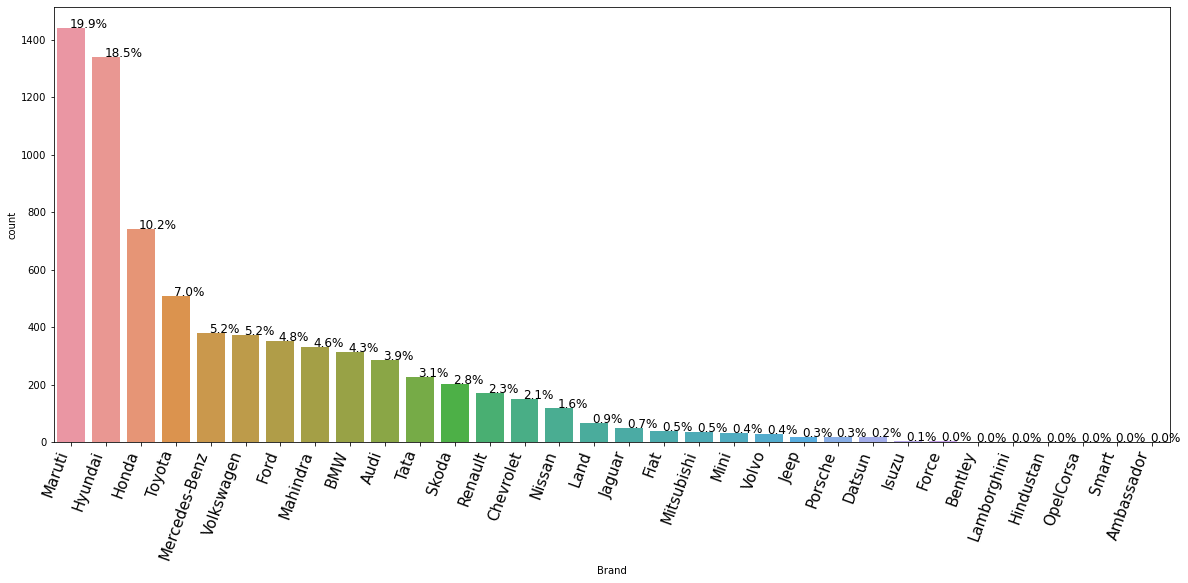

In [24]:
plt.figure(figsize=(20,8))
ax = sns.countplot(df["Brand"],order = df["Brand"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=70, ha="right")
perc_on_bar(ax, df["Brand"])

* Maruti and Hyundai brands both have exceptionally high counts of car sales/available compared to the other car brands.

**Location**

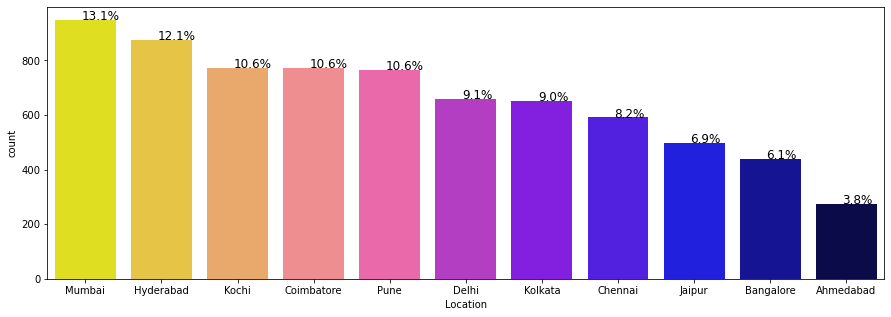

In [25]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Location"],palette='gnuplot2_r', order = df["Location"].value_counts().index)
perc_on_bar(ax,df["Location"])

* Mumbai is the city with the highest proportion of sold and available cars with a rate of 13.1%, followed by Hyderabad which is 12.1%.
* Kochi, Coimbatore and Pune all have relatively equal proportions of sold and available cars.
* Ahmedabad has the lowest proportion of car sales and cars available
with a rate of 3.8%

**Fuel_Type**

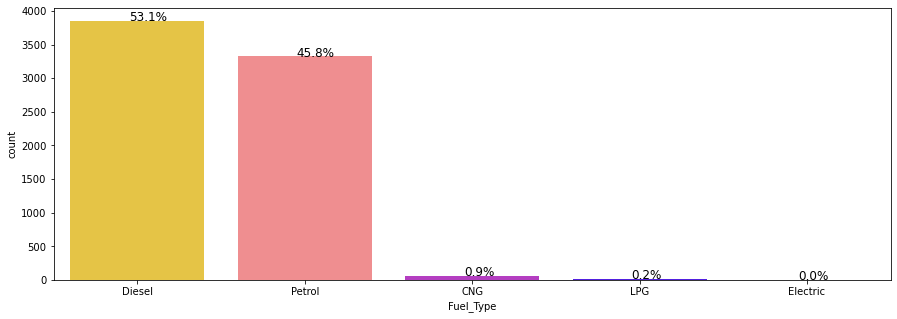

In [26]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Fuel_Type"],palette='gnuplot2_r', order = df["Fuel_Type"].value_counts().index)
perc_on_bar(ax,df["Fuel_Type"])

* Most of the cars sold or available for sale run on diesel and petrol compared to the other fuel types.

**Owner_Type**

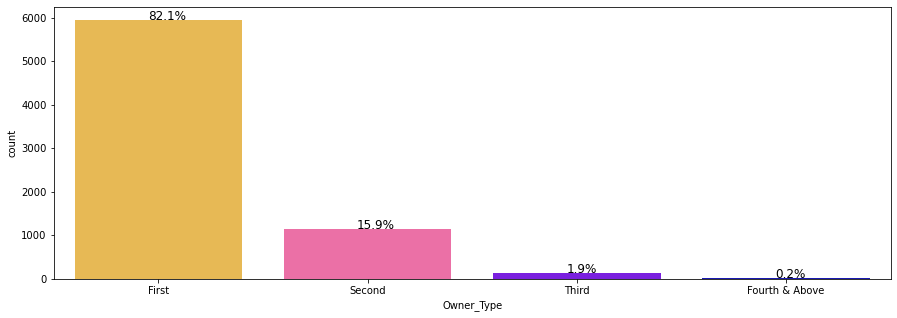

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Owner_Type"],palette='gnuplot2_r', order = df["Owner_Type"].value_counts().index)
perc_on_bar(ax,df["Owner_Type"])

* There are more cars with first time owner compared to the other types.
* Cars with third time and above owners are few.

**Transmission**

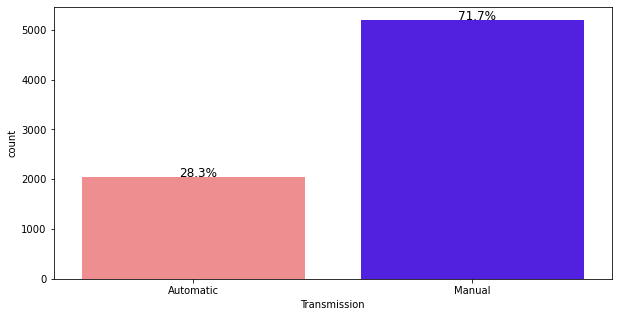

In [28]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Transmission"],palette='gnuplot2_r')
perc_on_bar(ax,df["Transmission"])

* The proportion of cars that has manual transmission is higher than that of automatic transmission with a difference of 48.4%.

## Bivariate analysis

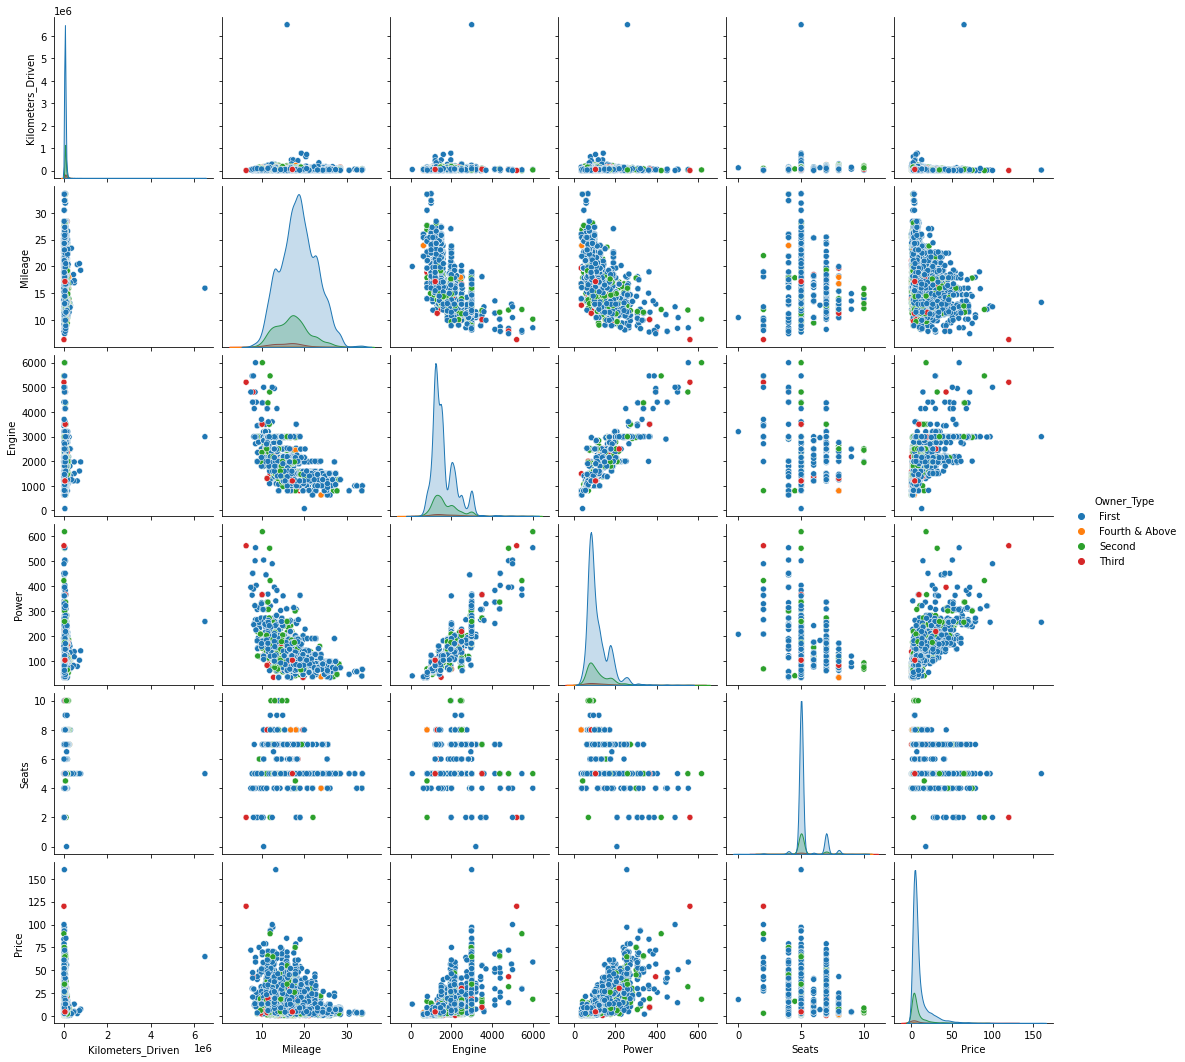

In [29]:
sns.pairplot(data=df.drop(["Year"],axis=1),hue="Owner_Type")
plt.show()

* We can see varying distributions in variables for different owner type, we should investigate it further.
* The more the displacement volume of the car engine, the more the power of the engine and also the higher the car price.
* There are more cars with first owner type

### Price vs Location

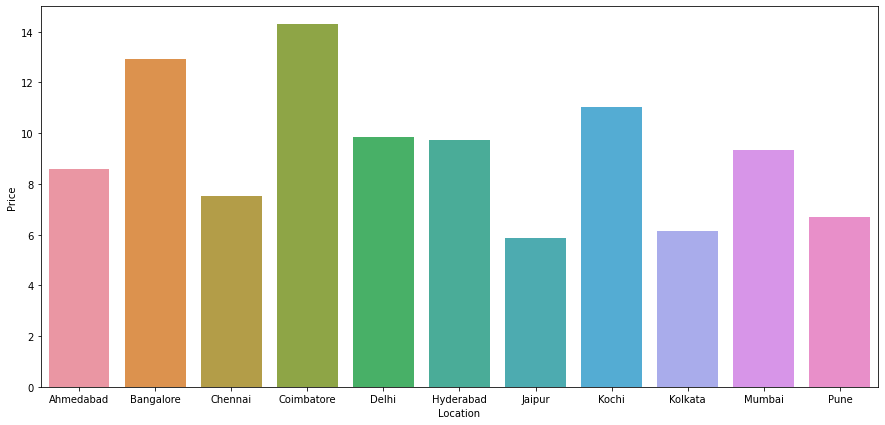

In [30]:
plt.figure(figsize=(15,7))
sns.barplot(x="Location", y="Price", data=df, ci=None)
plt.show()

* Car prices are cheaper in Jaipur and Kolkata.
* Car prices in Coimbatore goes as high as 14 Lakh and price in Banglore is also higher compared to the other cities.
* Maximum price in Delhi, Hyderabad and Mumbai seems to be approximately equal.

### Price vs Location vs Owner_Type

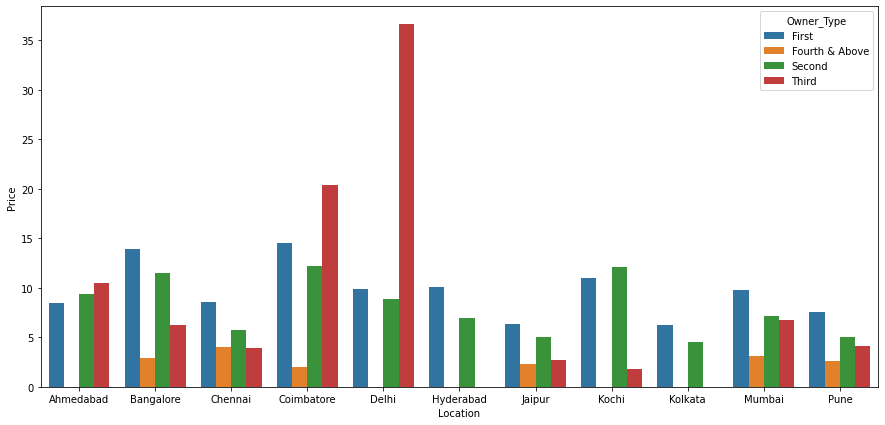

In [31]:
plt.figure(figsize=(15,7))
sns.barplot(x="Location", y="Price", data=df, hue="Owner_Type", ci=None)
plt.show()

* Delhi and Coimbatore has a high number of cars with third owner type.
* The maximum owner type of cars being sold or available in Hyderabad and Kolkata is Second.

### Price vs Location vs Fuel_Type

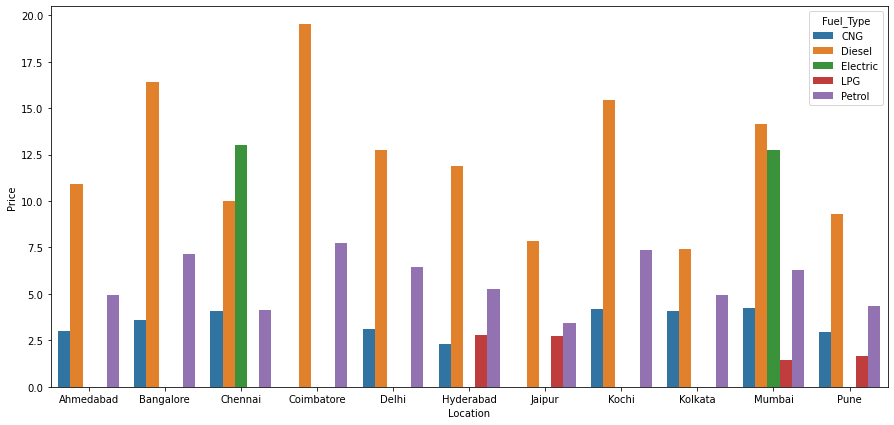

In [32]:
plt.figure(figsize=(15,7))
sns.barplot(x="Location", y="Price", data=df, hue="Fuel_Type", ci=None)
plt.show()

* Cars that runs on diesel are more expensive than cars that run on other fuel types in every city except for Chennai, where the price of electric cars are more.
* The price of electric cars in the two cities where it is being sold or available is approximately equal price and higher than the price of diesel cars in some other cities.
* Cars than run on LPG fuel type are the cheapest compared to the other fuel types.

### Price vs Location vs Transmission

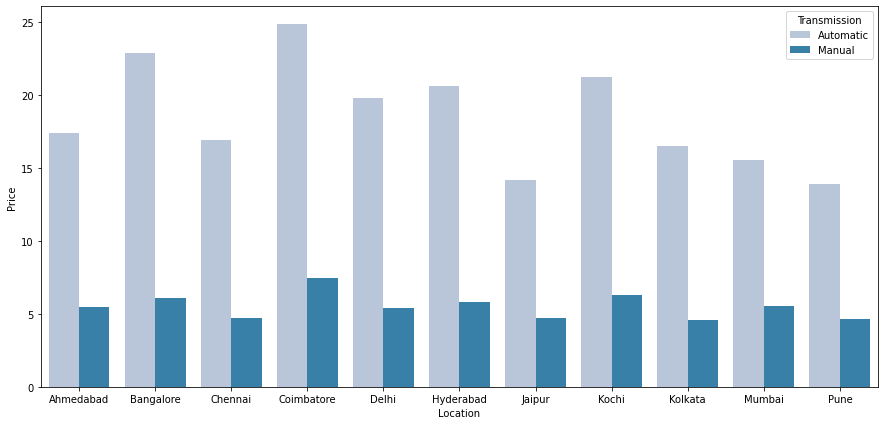

In [33]:
plt.figure(figsize=(15,7))
sns.barplot(x="Location", y="Price", data=df, hue="Transmission", ci=None, palette='PuBu')
plt.show()

* Cars with automatic transmission are more expensive than cars with manual transmission in every city.

### Price vs Brand vs Owner_Type

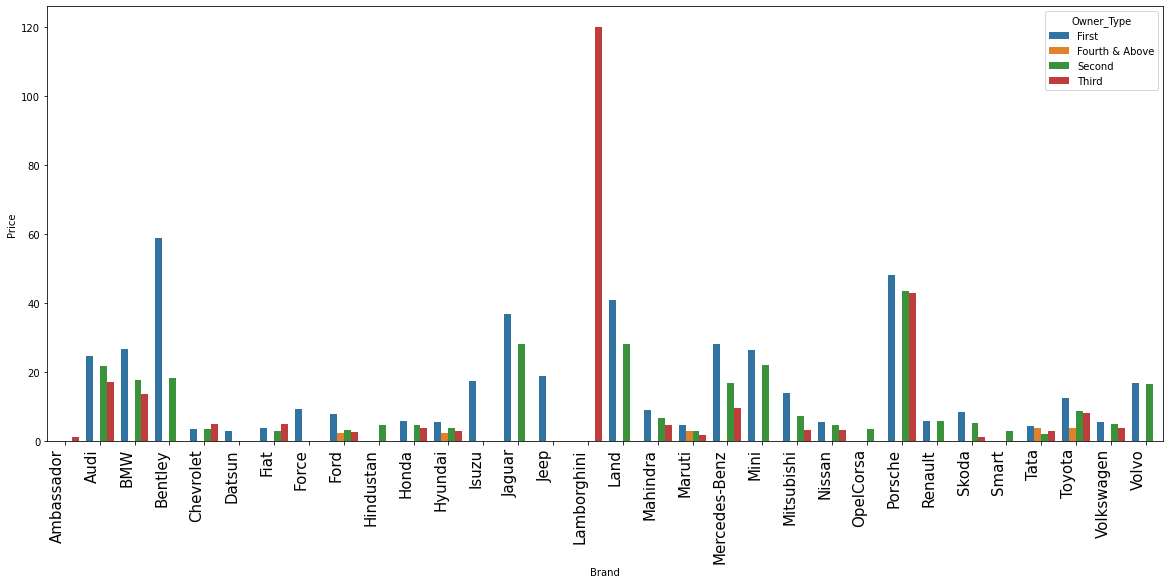

In [34]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x="Brand", y="Price", data=df,hue="Owner_Type",ci=None)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=90, ha="right")
plt.show()

* Most of the cars have more value when they have their owner type record as first.
* Some brands like Audi, Porsche, BMW don't tend to reduce much in value even as the number of owners increases.
* Lamborghini being a luxury brand retains a relatively high price even at a third owner type.

### Variation in Price with Year

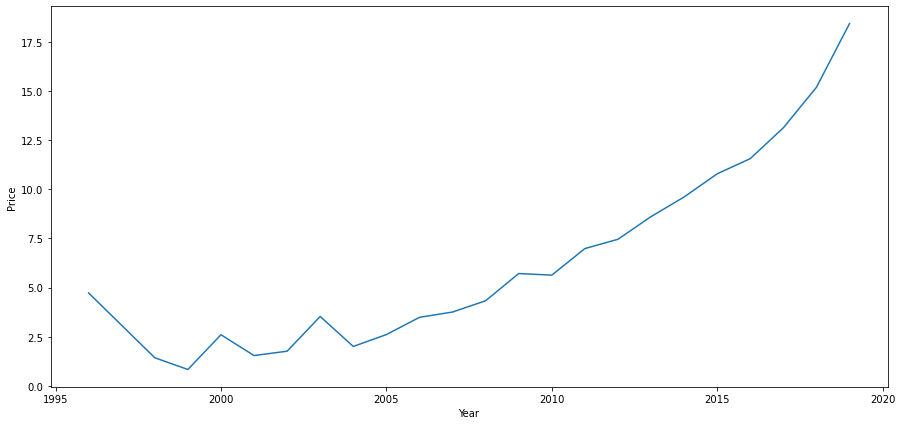

In [35]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="Year", y="Price", data=df, ci=None);

* The more recent the car manufacturing year is, the higher the car price.

### Correlation among pairs

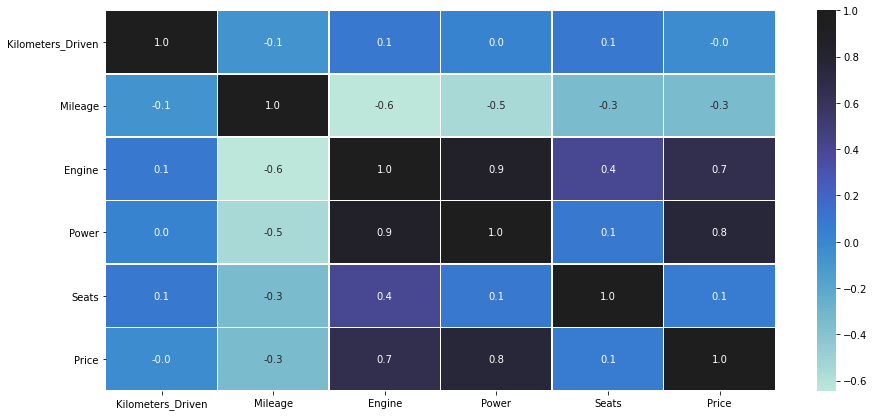

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(df[num_col].corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1)
plt.show()

* Price is highly correlated with power and engine, indicating the higher the power and engine of the car, the higher the price.
* A negative correlation between price and kilometers driven by previous owner is expected.

### Let's look at outliers in every numerical column

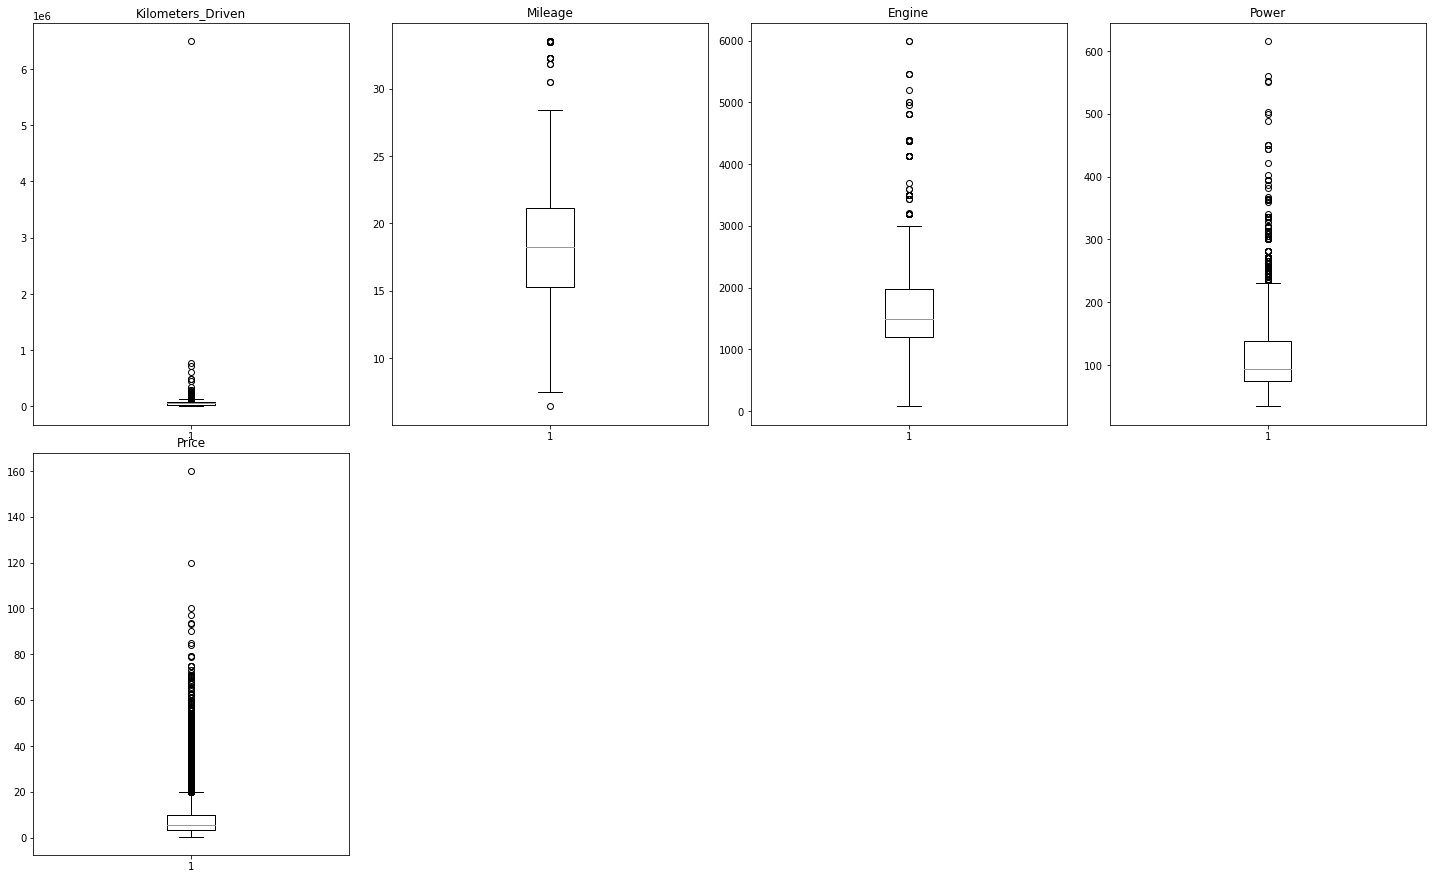

In [37]:
num_col.remove("Seats")
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Outlier Treatment

In [38]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
   
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
   
    for c in col_list:
        df = treat_outliers(df, c)

    return df

### Treating the outliers

In [39]:
df = treat_outliers_all(df, num_col)

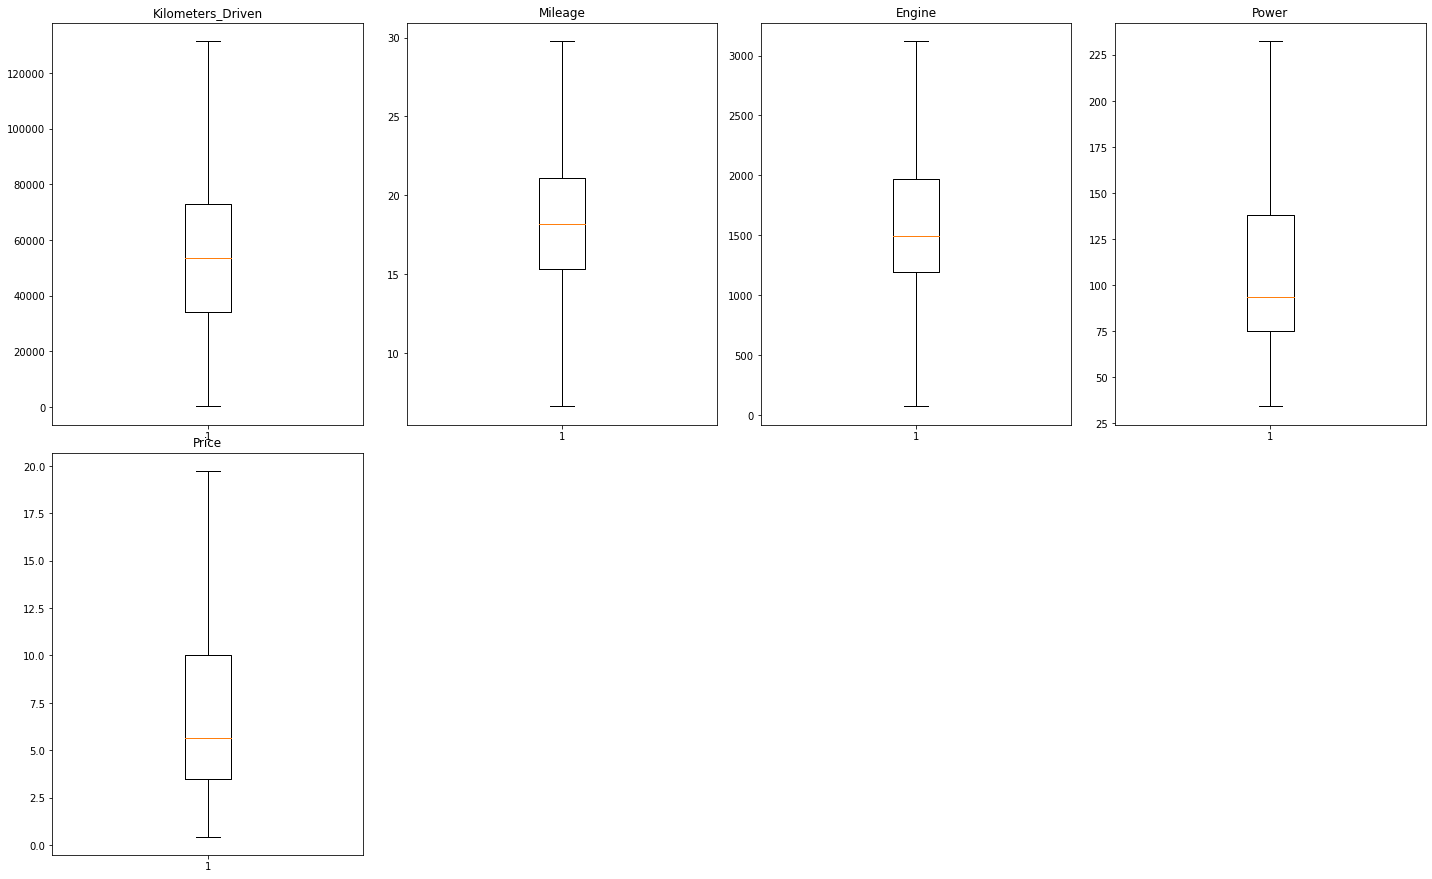

In [40]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# <a id='link3'>Data Preparation for Modeling</a>

In [41]:
# Label encoding column 'Seats'

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Seats']= label_encoder.fit_transform(df['Seats'])

In [42]:
# Creating a new column to give information about the car types and dropping the 'Brand' column

df['Car_Type'] = pd.cut(df['Price'], bins = [0.4, 9.5, 25.5, 65.6, 160], 
                        labels = ['Economy', 'Mid/Full_Size', 'Premium', 'Luxury'])
df.drop(['Brand'],axis=1,inplace=True)

In [43]:
df['Location'] = df['Location'].replace(['Delhi', 'Jaipur'], 'North')
df['Location'] = df['Location'].replace(['Kolkata'], 'East')
df['Location'] = df['Location'].replace(['Ahmedabad', 'Mumbai', 'Pune'], 'West')
df['Location'] = df['Location'].replace(['Bangalore', 'Chennai', 'Coimbatore', 'Hyderabad', 'Kochi'], 'South')

In [44]:
# Creating a new column to give information about the car's age and dropping the 'Year' column
# Dropping 'Fuel_Type' due to its dummies high p_values and high VIF in the model.

df["Car_Age"] = 2021 - df["Year"]
df.drop(['Year', 'Fuel_Type'],axis=1,inplace=True)
df.head()

,Location,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Type,Car_Age
S.No.,,,,,,,,,,,
0,West,72000.0,Manual,First,26.60,998.0,58.16,4,1.75,Economy,11
1,West,41000.0,Manual,First,19.67,1582.0,126.20,4,12.50,Mid/Full_Size,6
2,South,46000.0,Manual,First,18.20,1199.0,88.70,4,4.50,Economy,10
3,South,87000.0,Manual,First,20.77,1248.0,88.76,7,6.00,Economy,9
4,South,40670.0,Automatic,Second,15.20,1968.0,140.80,4,17.74,Mid/Full_Size,8


In [45]:
# defining X and y variables

X = df.drop("Price", axis=1)
y = df[["Price"]]

print(X.head())
print(y.head())

      Location  Kilometers_Driven Transmission Owner_Type  Mileage  Engine  \
S.No.                                                                        
0         West            72000.0       Manual      First    26.60   998.0   
1         West            41000.0       Manual      First    19.67  1582.0   
2        South            46000.0       Manual      First    18.20  1199.0   
3        South            87000.0       Manual      First    20.77  1248.0   
4        South            40670.0    Automatic     Second    15.20  1968.0   

        Power  Seats       Car_Type  Car_Age  
S.No.                                         
0       58.16      4        Economy       11  
1      126.20      4  Mid/Full_Size        6  
2       88.70      4        Economy       10  
3       88.76      7        Economy        9  
4      140.80      4  Mid/Full_Size        8  
       Price
S.No.       
0       1.75
1      12.50
2       4.50
3       6.00
4      17.74


In [46]:
print(X.shape)
print(y.shape)

(7249, 10)
(7249, 1)


In [47]:
# creating dummy variables
X = pd.get_dummies(X, columns=["Car_Type", "Location", "Transmission", "Owner_Type"], drop_first=True)
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Age,Car_Type_Mid/Full_Size,Car_Type_Premium,Car_Type_Luxury,Location_South,Location_North,Location_East,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,
0,72000.0,26.60,998.0,58.16,4,11,0,0,0,0,0,0,1,0,0,0
1,41000.0,19.67,1582.0,126.20,4,6,1,0,0,0,0,0,1,0,0,0
2,46000.0,18.20,1199.0,88.70,4,10,0,0,0,1,0,0,1,0,0,0
3,87000.0,20.77,1248.0,88.76,7,9,0,0,0,1,0,0,1,0,0,0
4,40670.0,15.20,1968.0,140.80,4,8,1,0,0,1,0,0,0,0,1,0


In [48]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [49]:
X_train.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Age,Car_Type_Mid/Full_Size,Car_Type_Premium,Car_Type_Luxury,Location_South,Location_North,Location_East,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,
62,58000.0,11.74,1796.0,186.00,4,6,1,0,0,0,1,0,0,0,0,0
6977,113565.0,12.99,2494.0,100.60,8,7,0,0,0,0,0,0,1,0,0,0
3502,54339.0,22.54,1396.0,88.73,4,6,0,0,0,0,0,0,1,0,1,0
2156,105044.0,12.99,2494.0,100.60,7,7,1,0,0,0,1,0,1,0,0,0
3862,57000.0,12.83,2696.0,162.00,7,8,1,0,0,0,0,0,1,0,0,0


# <a id='link4'>Choose, train and evaluate the model</a>

In [50]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [51]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Kilometers_Driven,-1.125925e-05
Mileage,7.875004e-02
Engine,1.512939e-03
Power,3.105403e-02
Seats,7.490071e-02
Car_Age,-2.961768e-01
Car_Type_Mid/Full_Size,7.053530e+00
Car_Type_Premium,1.776357e-15
Car_Type_Luxury,-4.440892e-16
Location_South,4.964463e-01


### Let's check the performance of the model using different metrics (MAE, MAPE, RMSE, $R^2$)

In [52]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
  
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },index=[0],)

In [53]:
# Checking model performance on train set
print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.36395,24.71955,1.839576,0.896637


In [54]:
# Checking model performance on test set
print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.385775,24.604612,1.876161,0.895956


**Observations**

- The training and testing scores are both 89%, and the scores are comparable. Hence, the model is a good fit.

- The model explains 89.6% of total variation in the test dataset. So, overall the model is very satisfactory.

- MAE indicates that our current model is able to predict price within a mean error of 1.4 on the test data.

- MAPE on the test set suggests we can predict within 24.6% of the price.

# <a id='link5'>Linear Regression using statsmodels</a>

In [55]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     3117.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:02:50   Log-Likelihood:                -10339.
No. Observations:                5074   AIC:                         2.071e+04
Df Residuals:                    5059   BIC:                         2.081e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations**

- Negative values of the coefficient show that price decreases with the increase of corresponding attribute value while positive values of the coefficient show that price increases with the increase of corresponding attribute value.

- Considering the significance level to be 0.05, any variable with a p-value less than 0.05 is significant.


# <a id='link6'>Checking Linear Regression Assumptions</a>

#### TEST FOR MULTICOLLINEARITY

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,150.4,const
1,1.7,Kilometers_Driven
2,2.2,Mileage
3,6.7,Engine
4,6.5,Power
5,1.8,Seats
6,2.0,Car_Age
7,2.5,Car_Type_Mid/Full_Size
8,NaN,Car_Type_Premium
9,NaN,Car_Type_Luxury


* There is moderate multicollinearity in Engine and Power and the two variables are correlated with each other.
* Non of the variable show sign of high multicollinearity.

**Let's drop the variable Seats since its the only variable with p-value greater than 0.05 that is not a dummy**

In [57]:
X_train2 = X_train1.drop("Seats", axis=1)

In [58]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     3355.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:02:50   Log-Likelihood:                -10341.
No. Observations:                5074   AIC:                         2.071e+04
Df Residuals:                    5060   BIC:                         2.080e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

* No feature has p-value greater than 0.05, so we'll consider the features in X_train2 as the final values and olsres1 as final model
* The model is able to explain 89.6% of variance. This shows that the model is good and the variable that was dropped did not affect the model.

#### MEAN OF RESIDUALS SHOULD BE 0

In [59]:
residual = olsres1.resid
np.mean(residual)

1.7223554514464688e-14

* Mean of residuals is very close to 0.

#### TEST FOR LINEARITY 

In [60]:
residual = olsres1.resid
fitted = olsres1.fittedvalues

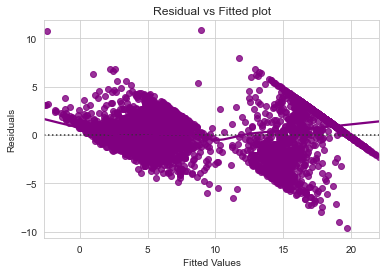

In [61]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

#### TEST FOR NORMALITY

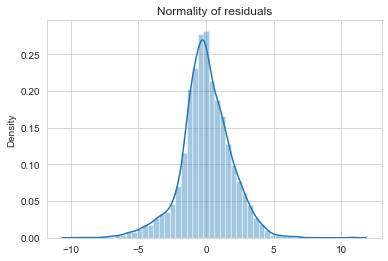

In [62]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

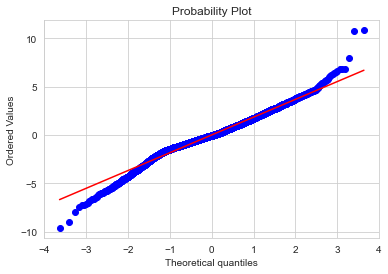

In [63]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

* Based on the QQ plot, the residuals are normal.

#### TEST FOR HOMOSCEDASTICITY

In [64]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train2)
lzip(name, test)

[('F statistic', 1.0617833347179166), ('p-value', 0.06611529494419746)]

* Since p-value > 0.05, we can say that the residuals are homoscedastic, therefore, the assumption is valid in the data.
* All the assumptions looks to be satisfied, we can move towards prediction

### Predicting on the test data

In [65]:
X_train2.columns

Index(['const', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Car_Age',
       'Car_Type_Mid/Full_Size', 'Car_Type_Premium', 'Car_Type_Luxury',
       'Location_South', 'Location_North', 'Location_East',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [66]:
X_test_final = X_test[X_train2.columns]

In [67]:
X_test_final.head()

,const,Kilometers_Driven,Mileage,Engine,Power,Car_Age,Car_Type_Mid/Full_Size,Car_Type_Premium,Car_Type_Luxury,Location_South,Location_North,Location_East,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,
2953,1.0,38755.0,25.80,1498.0,98.6,8,0,0,0,0,0,1,1,0,0,0
1634,1.0,46601.0,20.73,1373.0,91.1,6,0,0,0,1,0,0,1,0,0,0
2622,1.0,54000.0,19.87,1461.0,83.8,5,0,0,0,0,0,0,1,0,0,0
7050,1.0,92000.0,26.21,1248.0,88.5,6,0,0,0,0,1,0,1,0,0,0
6734,1.0,54000.0,14.53,1798.0,138.1,9,0,0,0,0,0,0,1,0,0,0


In [68]:
# Checking model performance on train set
print("Train Performance\n")
model_perf(olsres1, X_train2.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.381091,24.873274,1.857084,0.896045


In [69]:
# Checking model performance on test set
print("Test Performance\n")
model_perf(olsres1, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.350902,24.535105,1.838854,0.897003


* Model doesn't seem to be suffering from overfitting as the test and train RMSE and MAE are low and both errors are comparable.
* The model can explain 89.7% of the variation on the test set.

* The MAPE on the test set suggests we can predict within 24.5% of the price. 


### Hence, we can conclude the model *olsres1* is good for prediction as well as inference purposes.

In [70]:
# The model summary

olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     3355.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:02:58   Log-Likelihood:                -10341.
No. Observations:                5074   AIC:                         2.071e+04
Df Residuals:                    5060   BIC:                         2.080e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# <a id='link7'>Conclusions</a>

* olsres1 is the final model which follows all the assumptions and can be used for interpretations.


* Car age has a negative coefficient sign indicating as the car age increases, the price of the car decreases.


* Cars with manual transmission tend to have have lower price compared to cars with automatic transmission.


* Power and Engine have positive coefficients. So, they will increase as price increases.